In [6]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from imutils.video import FPS
import time

In [7]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')
print("[INFO] model loaded...")


[INFO] loading model...
[INFO] model loaded...


In [8]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
	
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))


In [9]:
def object_detection(image):
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    # pass the blob through the network and obtain the detections and
    # predictions
    
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()
    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > .60:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                          COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return image



[INFO] computing object detections...
[INFO] dog: 88.34%
[INFO] horse: 98.64%
[INFO] person: 99.95%


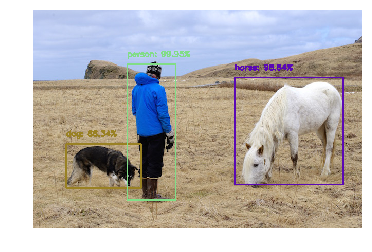

In [23]:
image=cv2.imread('sample_person.jpg')
image=object_detection(image)
# cv2.imshow('Result',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


[INFO] computing object detections...
[INFO] person: 99.57%
[INFO] person: 92.57%
[INFO] person: 91.56%
[INFO] person: 88.56%
[INFO] person: 79.49%
[INFO] person: 70.43%


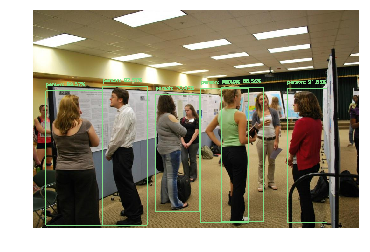

In [22]:
image=cv2.imread('test.jpg')
image=object_detection(image)
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [21]:
# path='/home/ashish/Desktop/final_pedesitrian_detection/seq02-img-left/*.png'
path='/home/ashish/Downloads/UrbanStreetRelease/Data/sequence01/images_left/*.jpg'

# path='final_pedesitrian_detection/seq03-img-left/*.png'


all_images=np.sort(glob.glob(path))
# # print(all_images)
fps = FPS().start()
for i in all_images:
	image=cv2.imread(i,1)
	image=object_detection(image)
	cv2.imshow('image',image)
	k = cv2.waitKey(30) & 0xff
	if k == 27:
		break
		
	fps.update()
	fps.stop()
	font = cv2.FONT_HERSHEY_SIMPLEX
	# cv2.putText(image,"FPS: {:.2f}".format(fps.fps()),(20,50), font, 1,(0,255,0),2,cv2.LINE_AA)

	print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))



cv2.destroyAllWindows()


[INFO] computing object detections...
[INFO] car: 99.54%
[INFO] person: 73.76%
[INFO] person: 73.70%
[INFO] approx. FPS: 8.21
[INFO] computing object detections...
[INFO] car: 99.75%
[INFO] person: 99.80%
[INFO] person: 64.53%
[INFO] approx. FPS: 7.82
[INFO] computing object detections...
[INFO] car: 98.47%
[INFO] person: 99.35%
[INFO] approx. FPS: 7.99
[INFO] computing object detections...
[INFO] car: 99.92%
[INFO] person: 85.86%
[INFO] person: 69.46%
[INFO] approx. FPS: 7.80
[INFO] computing object detections...
[INFO] car: 99.99%
[INFO] person: 63.02%
[INFO] person: 60.82%
[INFO] approx. FPS: 7.87
[INFO] computing object detections...
[INFO] car: 99.93%
[INFO] person: 86.22%
[INFO] person: 82.27%
[INFO] approx. FPS: 7.18
[INFO] computing object detections...
[INFO] car: 99.62%
[INFO] person: 97.03%
[INFO] person: 84.81%
[INFO] person: 64.49%
[INFO] approx. FPS: 6.71
[INFO] computing object detections...
[INFO] car: 99.13%
[INFO] person: 92.66%
[INFO] person: 89.13%
[INFO] person: 88

[INFO] person: 94.99%
[INFO] person: 93.53%
[INFO] person: 88.39%
[INFO] person: 77.57%
[INFO] person: 70.21%
[INFO] person: 68.93%
[INFO] person: 67.77%
[INFO] approx. FPS: 7.55
[INFO] computing object detections...
[INFO] person: 96.43%
[INFO] person: 94.83%
[INFO] person: 87.11%
[INFO] person: 71.24%
[INFO] person: 69.42%
[INFO] person: 67.49%
[INFO] approx. FPS: 7.56
[INFO] computing object detections...
[INFO] person: 98.70%
[INFO] person: 98.47%
[INFO] person: 88.78%
[INFO] person: 76.33%
[INFO] approx. FPS: 7.57
[INFO] computing object detections...
[INFO] person: 97.93%
[INFO] person: 93.90%
[INFO] person: 68.81%
[INFO] approx. FPS: 7.58
[INFO] computing object detections...
[INFO] person: 97.96%
[INFO] person: 92.78%
[INFO] person: 71.88%
[INFO] person: 70.70%
[INFO] person: 69.25%
[INFO] approx. FPS: 7.59
[INFO] computing object detections...
[INFO] person: 99.01%
[INFO] person: 94.59%
[INFO] person: 70.40%
[INFO] person: 65.88%
[INFO] approx. FPS: 7.61
[INFO] computing objec